In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import probscale
#import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from statsmodels.formula.api import ols
from sklearn import ensemble
from scipy import stats

%matplotlib inline

In [3]:
df = pd.read_csv("data/kc_house_data.csv")

In [4]:
df.shape
df.dtypes
df.corr()
df.columns
#number of columns, number of rows, types of data and raw correlations

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df['sqft_basement'] = np.where(df['sqft_basement']=='?', 0, df['sqft_basement'])
df['sqft_basement'] = df['sqft_basement'].astype(float)
df['condition'] = np.where(df['condition']=='?', 0, df['condition'])
df['condition'] = df['condition'].astype(float)
#gets rid of odd characters and changes all datat types to flaots

In [6]:
df['sqft_basement']

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: float64

In [7]:
df = df.fillna(0)
df.isna().sum()
# filling all the NaNs in with zeros for entire dataframe
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [8]:
df['has_basement1'] = np.where(df['sqft_basement']=='?', 0, df['sqft_basement'])
df['has_basement1'] = df['has_basement1'].astype(float)
df['has_basement'] = np.where(df['has_basement1']>0, 1, 0)
df = df.drop(columns=['has_basement1'])
df = df.drop(columns=['has_basementsqft'])
#creats a binary for if a property has a basement or does not

KeyError: "['has_basementsqft'] not found in axis"

In [ ]:
df

In [ ]:
#dfTargetFeats = df[[]]
df.sqft_living.mean()

In [ ]:
df_expensive = df.sort_values(by=['price'], ascending=True)
df_expensive

In [9]:
meanp = df_expensive['price'].mean()
minp = df_expensive['price'].min()
maxp = df_expensive['price'].max()
#df_expensive['price'].describe()
print('mean ', meanp, 'min ' , minp, 'max ', maxp)

NameError: name 'df_expensive' is not defined

In [10]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,-0.023803,...,-0.010799,-0.004359,0.021617,-0.010612,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,0.003495
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,...,0.605368,0.321108,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845,0.178264
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,...,0.479386,0.297229,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.158412
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,...,0.686668,0.278485,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303,0.159863
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,...,0.876448,0.428660,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342,0.201198
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,...,0.184139,0.015031,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204,-0.034889
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,...,0.523989,-0.241866,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722,-0.252465
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,...,0.071778,0.083050,-0.024487,0.073939,0.028923,-0.012157,-0.037628,0.083823,0.030658,0.039220
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,...,0.166017,0.270629,-0.054452,0.090339,0.085059,0.006321,-0.077702,0.278928,0.073083,0.176905
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,...,-0.158904,0.168482,-0.361592,-0.055808,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.130542


In [11]:
df.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

Text(0, 0.5, 'price')

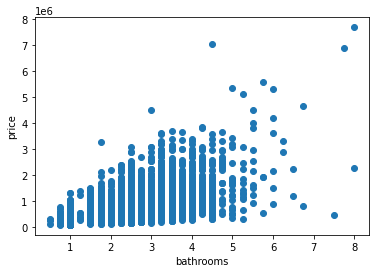

In [12]:
df.corr()['bathrooms']['price']
num_bathroom = df['bathrooms']
price = df['price']
fig, ax = plt.subplots()
ax.scatter(num_bathroom, price)
plt.xlabel('bathrooms')
plt.ylabel('price')
# graph that shows a positive correlation between price and bathrooms
#Find houses with low num of bathrooms

Text(0, 0.5, 'price')

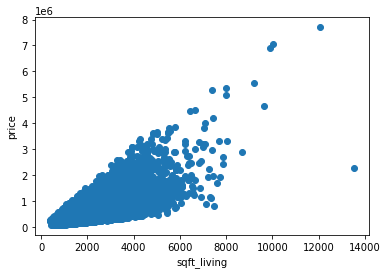

In [13]:
df.corr()['sqft_living']['price']
sqft_live = df['sqft_living']
price = df['price']
fig, ax = plt.subplots()
ax.scatter(sqft_live, price)
plt.xlabel('sqft_living')
plt.ylabel('price')
#graph that shows a positive correlation between price and square foot of living
#Find houses with lower squarefootage but with a higher average neighboring squarefootage

Text(0, 0.5, 'price')

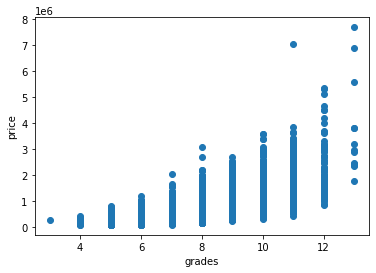

In [14]:
df.corr()['grade']['price']
grades = df['grade']
price = df['price']
fig, ax = plt.subplots()
ax.scatter(grades, price)
plt.xlabel('grades')
plt.ylabel('price')
#shows the positive correlation between price and grade
#Recommend high lot value/low building value for teardown

In [15]:
price_kctest = "price~bedrooms+sqft_living"
pricekc_modtest = ols(formula=price_kctest, data=df).fit()
pricekc_mod_summtest = pricekc_modtest.summary()
#baseline regression model

In [16]:
#qqplot(pricekc_modtest.resid, line = 'q')

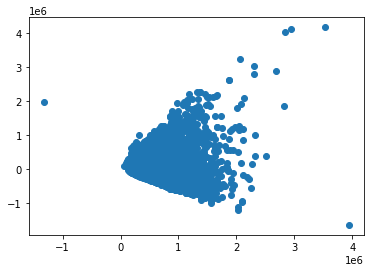

In [17]:
y =pricekc_modtest.resid
x = pricekc_modtest.predict(df[['bedrooms', 'sqft_living']])
fig, ax = plt.subplots()
ax.scatter(x,y)


In [18]:
df.iloc[x[x == x.min()].index]
#2402100895
#explanatory data analysis
#df.iloc[x[x == x.max()].index]
#df.iloc[y[y == y.max()].index]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700,1


In [19]:
i =df[(df.id == 2402100895)].index
df =df.drop(i)
# get index of outlier, drop outlier

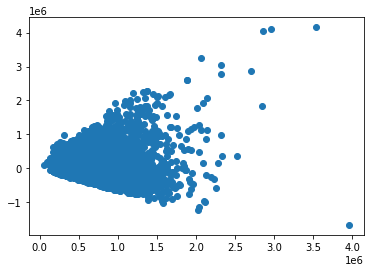

In [20]:
price_kctest = "price~bedrooms+sqft_living"
pricekc_modtest = ols(formula=price_kctest, data=df).fit()
pricekc_mod_summtest = pricekc_modtest.summary()
y =pricekc_modtest.resid
x = pricekc_modtest.predict(df[['bedrooms', 'sqft_living']])
fig, ax = plt.subplots()
ax.scatter(x,y)
# replot scatter plot with dropped outlier for more normal distribution


In [21]:
price_kctest = "price~bedrooms+sqft_living"
pricekc_modtest = ols(formula=price_kctest, data=df).fit()
pricekc_mod_summtest = pricekc_modtest.summary()
#qqplot(pricekc_modtest.resid, line = 'q')
#pricekc_mod_summtest 

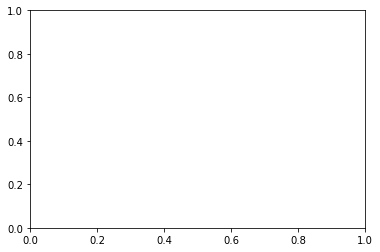

In [22]:
#initial model is not good. check with small list of features of highly correledted data
# lits of high corrrelations from big to small: sqft_living, grade, sqft_above, sqft_living15, bathrooms

price_sqftliving_grade = "price~sqft_living+grade"
price_sqftliving_grade_mod =  ols(formula=price_sqftliving_grade, data=df).fit()
price_sqftliving_grade_mod.summary()
#qqplot(price_sqftliving_grade_mod.resid, line = 'q')
y =price_sqftliving_grade_mod.resid
x = price_sqftliving_grade_mod.predict(df[['grade', 'sqft_living']])
fig, ax = plt.subplots()
#ax.scatter(x,y)

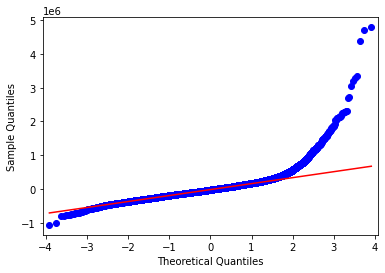

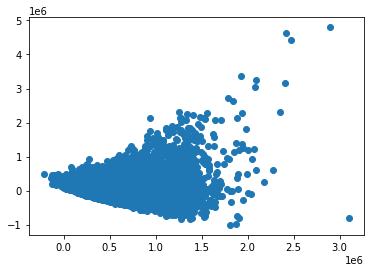

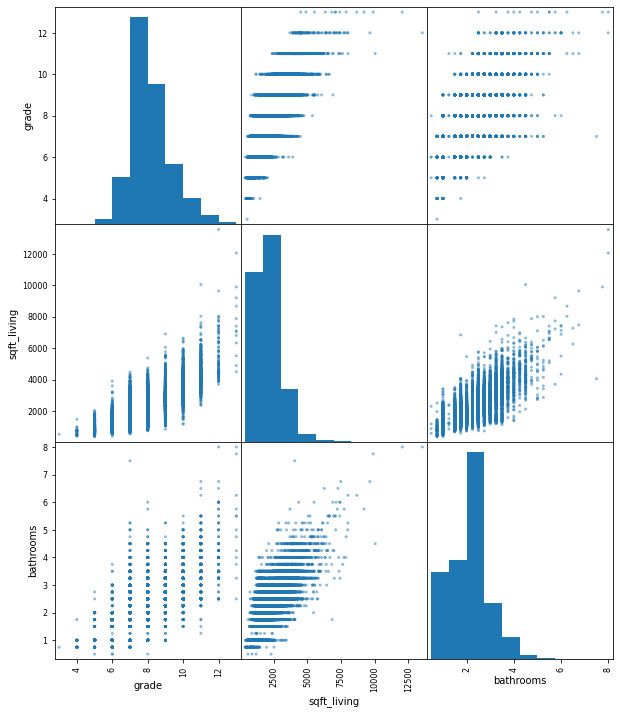

In [23]:
price_sqftliving_grade_bath = "price~sqft_living+grade+bathrooms"
price_sqftliving_grade_bath_mod =  ols(formula=price_sqftliving_grade_bath, data=df).fit()
#model creation

price_sqftliving_grade_bath_mod.summary()
#summary of model r2 = 0.537

qqplot(price_sqftliving_grade_mod.resid, line = 'q')
#qq plot

y =price_sqftliving_grade_bath_mod.resid
x = price_sqftliving_grade_bath_mod.predict(df[['grade', 'sqft_living', 'bathrooms']])
fig, ax = plt.subplots()
ax.scatter(x,y)
#scatter plot

feats = ['grade', 'sqft_living', 'bathrooms']
pd.plotting.scatter_matrix(df[feats], figsize=(10,12));
# scatter matrix, sqft_living and bathrooms non normal


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     6547.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:58:00   Log-Likelihood:            -3.0039e+05
No. Observations:               21596   AIC:                         6.008e+05
Df Residuals:                   21592   BIC:                         6.008e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.183e+06   4.57e+04    -47.812      0.000   -2.27e+06   -2.09e+06
sqft_living  2.075e+05   7545.910     27.498      0.000    1.93e+05    2.22e+05
grade         1.47e+05   2367.511     62.096      0.000    1.42e+05    1.52e+05
bathrooms    1.467e+04   3733.780      3.930      0.000    7353.877     2.2e+04
==============================================================================
Omnibus:                    20044.601   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2131786.020
Skew:                           4.128   Prob(JB):                         0.00
Kurtosis:                      50.968   Cond. No.                         283.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

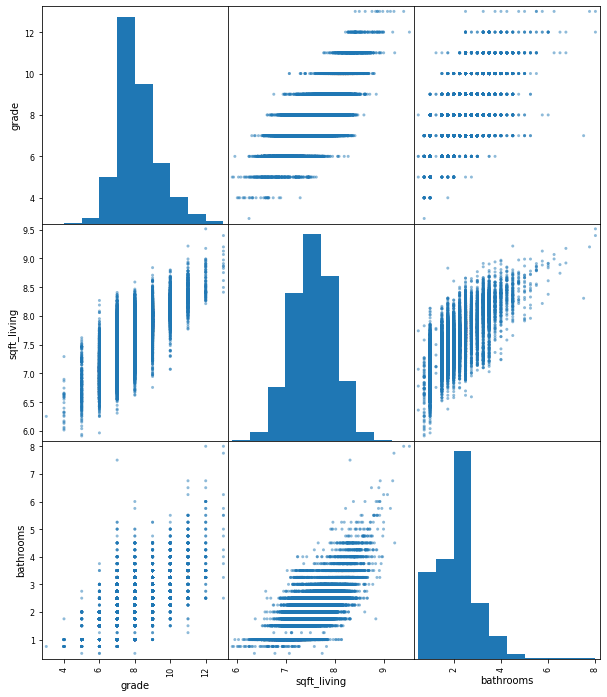

In [24]:
non_normal = ['sqft_living'] #bathrooms is too small and needs to be bumped by 1 to not produce NaN
#non normally distributed features to put into log space
for feat in non_normal:
    df[feat] = df[feat].map(lambda x: np.log(x))
#log tranformation
feats = ['grade', 'sqft_living', 'bathrooms']
pd.plotting.scatter_matrix(df[feats], figsize=(10,12));
#plot ot check for normality


price_sqftliving_grade_bath = "price~sqft_living+grade+bathrooms"

price_sqftliving_grade_bath_mod =  ols(formula=price_sqftliving_grade_bath, data=df).fit()
#model creation

price_sqftliving_grade_bath_mod.summary()
#summary of model r2 = 0.537

In [25]:
df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [26]:
#start changing data, by log transforming 3 features

In [27]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
0,7129300520,10/13/2014,221900.0,3,1.00,7.073270,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,7.851661,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2/25/2015,180000.0,2,1.00,6.646391,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,7.580700,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,2/18/2015,510000.0,3,2.00,7.426549,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


In [28]:
len(df.zipcode.value_counts())

70

In [29]:
len(df.bathrooms.value_counts())


29

In [30]:
len(df.floors.value_counts())

6

## Model + One hot encoded Floor


In [39]:
from sklearn.preprocessing import OneHotEncoder
#ohe= OneHotEncoder()
#ohe = OneHotEncoder(drop = 'first', sparse = False)
#columns =np.delete(ohe.categories_[0], ohe.drop_idx_)
#columns = ['fl' + str(x) for x in columns]
pd.DataFrame(ohe.fit_transform(df[['floors']]))
ohe.categories_

[array([1. , 1.5, 2. , 2.5, 3. , 3.5])]

<ipython-input-144-fdfe59f62825>:1: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  columns =np.delete(ohe.categories_[0], ohe.drop_idx_)


['fl1.5', 'fl2.0', 'fl2.5', 'fl3.0', 'fl3.5']

In [35]:
ohe.__dict__
#looking fr categories_

{'categories': 'auto',
 'sparse': False,
 'dtype': numpy.float64,
 'handle_unknown': 'error',
 'drop': 'first'}